In [26]:
import numpy as np
from keras.datasets import mnist


def unit_step_func(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1  - x)


class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = 0
        #self.best_weights = None
        #self.best_bias = None
        #self.best_error = float('inf')



    def fit(self, X, y):
        n_samples, n_features = X.shape
        # self.weights = np.random.uniform(size=(n_features))
        self.weights = np.zeros(n_features)
        #self.best_weights = self.weights.copy()
        #self.best_bias = self.bias
        for _ in range(self.n_iters):
            for x_i, y_i in zip(X, y):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = sigmoid(linear_output)
                
                error =  y_i - y_predicted
                
                output_error = error * sigmoid_derivative(y_predicted)
                
                self.weights += x_i.T.dot(output_error) * self.lr
                
                
                self.bias += np.sum(output_error, axis=0, keepdims=True) * self.lr

            #current_error = np.mean(np.abs(y - self.predict(X)))
            #if current_error < self.best_error:
            #    self.best_weights = self.weights.copy()
            #    self.best_bias = self.bias
            #    self.best_error = current_error

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_output)
        return y_predicted

In [27]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Redimensionar as imagens para 5x7
# new_shape = (5, 7)
train_images_resized = np.zeros((train_images.shape[0], 784))
test_images_resized = np.zeros((test_images.shape[0], 784))



for i in range(train_images.shape[0]):
    train_images_resized[i] = np.resize(train_images[i]/np.max(train_images[i]), 784).flatten()

for i in range(test_images.shape[0]):
    test_images_resized[i] = np.resize(test_images[i]/np.max(train_images[i]), 784).flatten()

In [28]:
train_labels = [ 1 if label == 0 else 0 for label in train_labels]

In [29]:
test_labels = [ 1 if label == 0 else 0 for label in test_labels]

In [30]:
train_images_resized = train_images_resized[:10]
train_labels = train_labels[:10]

In [31]:
test_images_resized = test_images_resized[:10]
test_labels = test_labels[:10]

In [32]:


digits_to_recognize = [0]


X, y = train_images_resized,train_labels
# X, y = load_images_from_folder("data", digit_to_recognize)
p = Perceptron(learning_rate=0.05,n_iters=100000)
p.fit(X, y)

In [33]:
p.predict(test_images_resized)

array([0.02672039, 0.04857596, 0.0325426 , 0.54004362, 0.01357962,
       0.0050383 , 0.00144283, 0.00152423, 0.00244313, 0.00185735])

In [34]:
test_labels

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [ ]:
np.set_printoptions(precision=6, suppress=True)

In [ ]:
train_labels

[0, 0, 0, 1, 0, 0, 1, 0, 1, 0]

In [ ]:
p.weights

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.  

In [ ]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

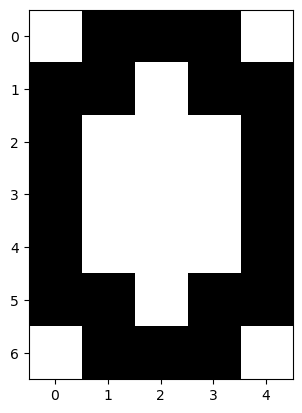

Rótulo da imagem:  [[0 1 1 1 0]
 [1 1 0 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 0 1 1]
 [0 1 1 1 0]]


In [45]:
arr = [0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0]
image = np.resize(arr, (7,5))
import matplotlib.pyplot as plt
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()
print("Rótulo da imagem: ", image)

In [47]:
arr = [0,0,0,0,1,1,1,1,0,0,1,1,1,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0]

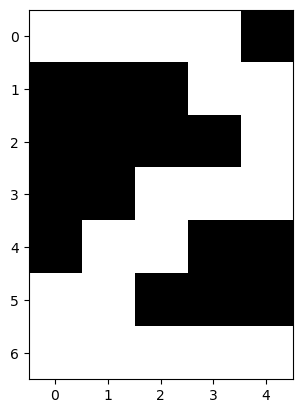

Rótulo da imagem:  [[0 0 0 0 1]
 [1 1 1 0 0]
 [1 1 1 1 0]
 [1 1 0 0 0]
 [1 0 0 1 1]
 [0 0 1 1 1]
 [0 0 0 0 0]]


In [48]:
image = np.resize(arr, (7,5))
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()
print("Rótulo da imagem: ", image)

In [41]:
image = np.resize(arr, (5,7))

In [42]:
import matplotlib.pyplot as plt

In [49]:
this_dict = [{"player_1":"Player 1", "numbers":{2,5,4,43,12,24}}, {"player_2":"Player 2", "numbers":{12,14,23,35,15,6}}, {"player_3":"Player 3", "numbers":{32,2,65,35,32}}, {"player_4":"Player 4", "numbers":{24,23,26,58,27}}]

for playername in this_dict:
    inter_var = len(this_dict[numbers].intersection(playername))
    top_player = playername
 
    if inter_var > len(top_player[numbers].intersection(lottery_numbers)):
        print(f"{top_player} won {winnings}")

NameError: name 'numbers' is not defined